<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/1stWeekTask/50Startups_SimpleMultiplePolynomial_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import pustaka yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [48]:
# Memuat data dari file CSV
file_path = 'sample_data/50_Startups.csv'
data = pd.read_csv(file_path)

In [49]:
# Menghapus kolom "State" karena kita hanya fokus pada variabel numerik
data_clean = data.drop('State', axis=1)

In [50]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = data_clean[['R&D Spend']]  # Menggunakan kolom R&D Spend sebagai fitur
y = data_clean['Profit']  # Menggunakan kolom Profit sebagai target

In [51]:
# Memisahkan data menjadi set pelatihan (train) dan pengujian (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# 1. Regresi Linear Sederhana (Simple Linear Regression)
linear_model = LinearRegression()  # Membuat model regresi linear
linear_model.fit(X_train, y_train)  # Melatih model dengan data training

LinearRegression()

In [53]:
# Memprediksi dan mengevaluasi model Regresi Linear Sederhana
y_pred_linear = linear_model.predict(X_test)  # Memprediksi nilai profit pada data test
linear_mse = mean_squared_error(y_test, y_pred_linear)  # Menghitung Mean Squared Error
linear_r2 = r2_score(y_test, y_pred_linear)  # Menghitung R2 score

In [54]:
# 2. Regresi Linear Berganda (dengan fitur polinomial derajat 2)
poly = PolynomialFeatures(degree=2)  # Menggunakan fitur polinomial dengan derajat 2
X_poly_train = poly.fit_transform(X_train)  # Mengubah data train menjadi bentuk polinomial
X_poly_test = poly.transform(X_test)  # Mengubah data test menjadi bentuk polinomial

In [55]:
multiple_model = LinearRegression()  # Membuat model regresi linear berganda
multiple_model.fit(X_poly_train, y_train)  # Melatih model dengan data training yang telah diubah

LinearRegression()

In [56]:
# Memprediksi dan mengevaluasi model Regresi Linear Berganda
y_pred_multiple = multiple_model.predict(X_poly_test)  # Memprediksi nilai profit
multiple_mse = mean_squared_error(y_test, y_pred_multiple)  # Menghitung Mean Squared Error
multiple_r2 = r2_score(y_test, y_pred_multiple)  # Menghitung R2 score

In [57]:
# 3. Regresi Polinomial (derajat 4)
poly_high = PolynomialFeatures(degree=4)  # Menggunakan fitur polinomial dengan derajat lebih tinggi (4)
X_poly_high_train = poly_high.fit_transform(X_train)  # Mengubah data train menjadi bentuk polinomial derajat 4
X_poly_high_test = poly_high.transform(X_test)  # Mengubah data test menjadi bentuk polinomial derajat 4


In [58]:
poly_model = LinearRegression()  # Membuat model regresi linear polinomial
poly_model.fit(X_poly_high_train, y_train)  # Melatih model dengan data training yang telah diubah

LinearRegression()

In [59]:
# Memprediksi dan mengevaluasi model Regresi Polinomial
y_pred_poly = poly_model.predict(X_poly_high_test)  # Memprediksi nilai profit
poly_mse = mean_squared_error(y_test, y_pred_poly)  # Menghitung Mean Squared Error
poly_r2 = r2_score(y_test, y_pred_poly)  # Menghitung R2 score


In [60]:
# Menampilkan hasil evaluasi
print("Simple Linear Regression: MSE =", linear_mse, "R2 =", linear_r2)
print("Multiple Linear Regression (Degree 2): MSE =", multiple_mse, "R2 =", multiple_r2)
print("Polynomial Regression (Degree 4): MSE =", poly_mse, "R2 =", poly_r2)

Simple Linear Regression: MSE = 59510962.80787997 R2 = 0.9265108109341951
Multiple Linear Regression (Degree 2): MSE = 63094698.59318112 R2 = 0.9220853097448072
Polynomial Regression (Degree 4): MSE = 74465492.57208416 R2 = 0.9080436880146799


In [61]:
# Plotting hasil
X_range = np.linspace(X.min(), X.max(), 100)  # Membuat range nilai untuk R&D Spend

In [62]:
# Prediksi untuk regresi linear sederhana
y_linear_plot = linear_model.predict(X_range)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
# Prediksi untuk regresi linear berganda (derajat 2)
X_poly_range_degree2 = poly.transform(X_range)
y_multiple_plot = multiple_model.predict(X_poly_range_degree2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [64]:
# Prediksi untuk regresi polinomial (derajat 4)
X_poly_range = poly_high.transform(X_range)
y_poly_plot = poly_model.predict(X_poly_range)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [65]:
# Memvisualisasikan hasil
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

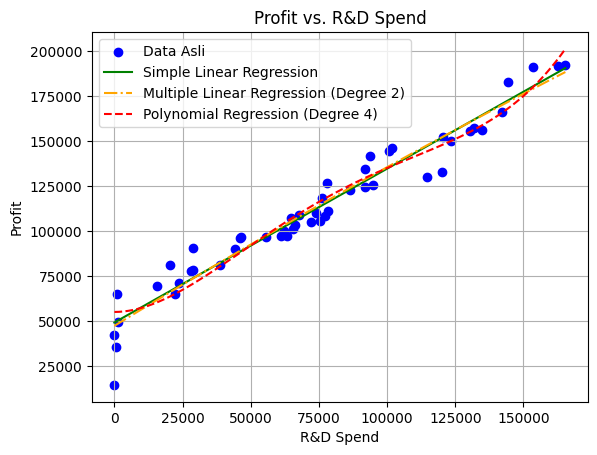

In [69]:
# Menampilkan data asli (scatter plot)
plt.scatter(X, y, color='blue', label='Data Asli')
# Menampilkan Regresi Linear Sederhana
plt.plot(X_range, y_linear_plot, color='green', label='Simple Linear Regression')
# Menampilkan Regresi Linear Berganda (derajat 2)
plt.plot(X_range, y_multiple_plot, color='orange', linestyle='-.', label='Multiple Linear Regression (Degree 2)')
# Menampilkan Regresi Polinomial (derajat 4)
plt.plot(X_range, y_poly_plot, color='red', linestyle='--', label='Polynomial Regression (Degree 4)')

plt.title('Profit vs. R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()
